# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from pandas.plotting import parallel_coordinates

In [2]:
data = pd.read_csv(r"D:\Sensei's Den\Data Science\Projects\Water Quality Prediction\archive\water_potability.csv")

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Cleaning

### Rows and Columns

In [4]:
data.shape

(3276, 10)

### Finding Null Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Imputing Missing Values

In [7]:
data.fillna(data.mean(),inplace=True)

In [8]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

In [10]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Checking if we need to do Dimensionality Reduction

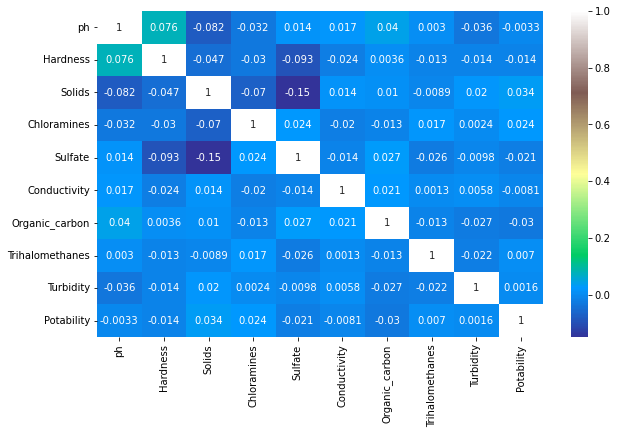

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Let's check the Outliers using Box Plot

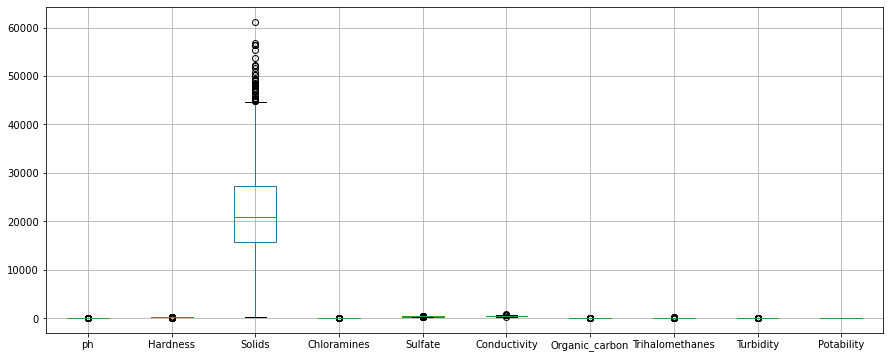

In [12]:
data.boxplot(figsize=(15,6))
plt.show()

- Yes it is normal to get this large values. So either we can keep it or drop it. 
- We can also perform A/B Testing if we want.
- We can move forward with keeping it as the dataset is significantly smaller, However if the accuracy of model is hampered, we will try removing it and chech its accuracy again.
- for now, Let's solve by including these values, because there are lots of outliers which can mean that excess solid shows bad quality.

In [13]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

### Potability count of bad water vs good water

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

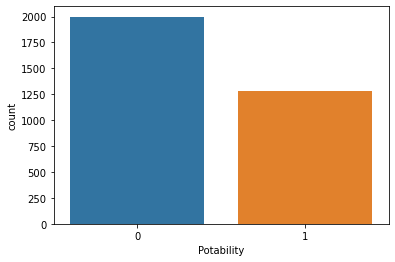

In [14]:
sns.countplot(data['Potability'])

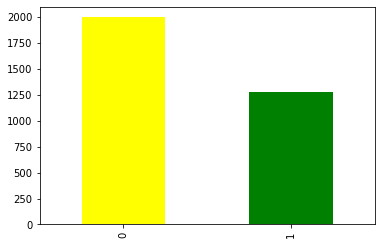

In [15]:
data['Potability'].value_counts().plot(kind="bar",color=["yellow","green"])
plt.show()

In [16]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

### Observe Distribution of every variable

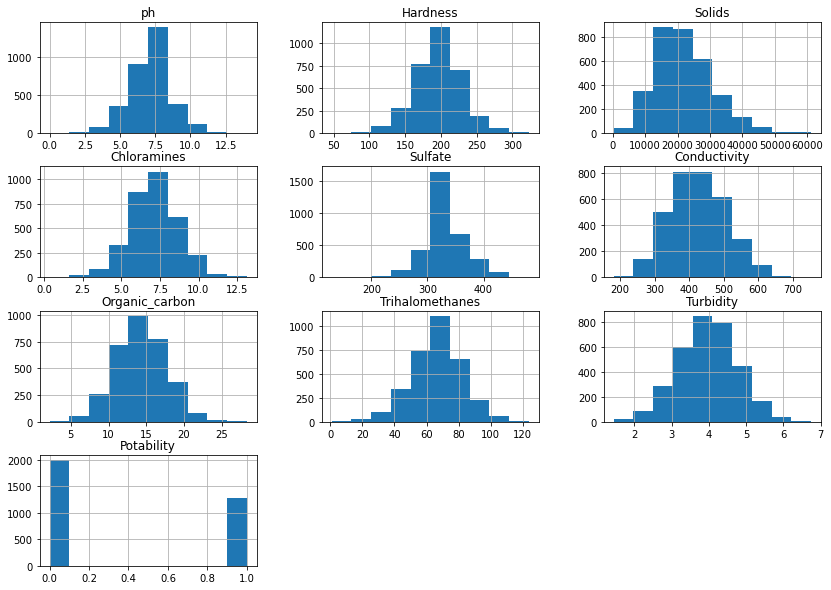

In [17]:
data.hist(figsize=(14,10))
plt.show()

### ph vs Hardness

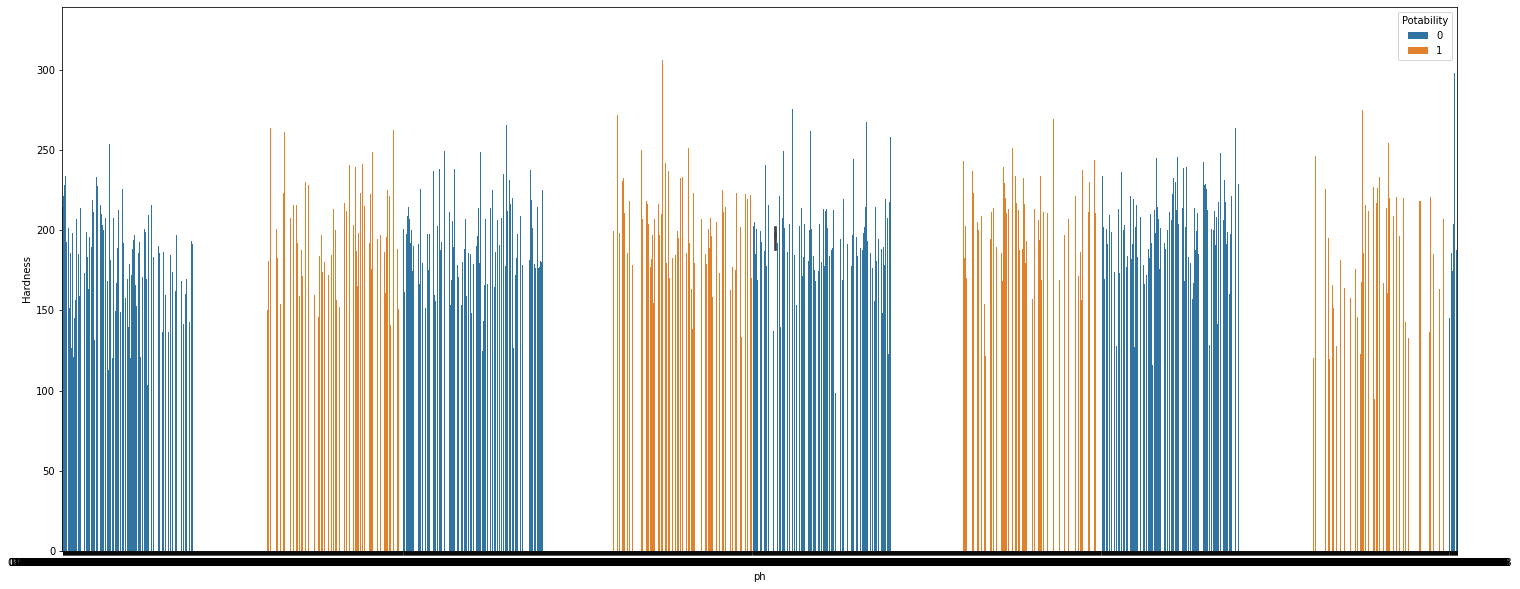

In [18]:
sns.barplot(x=data['ph'],y=data['Hardness'],hue=data['Potability'])
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

### Solids vs ph

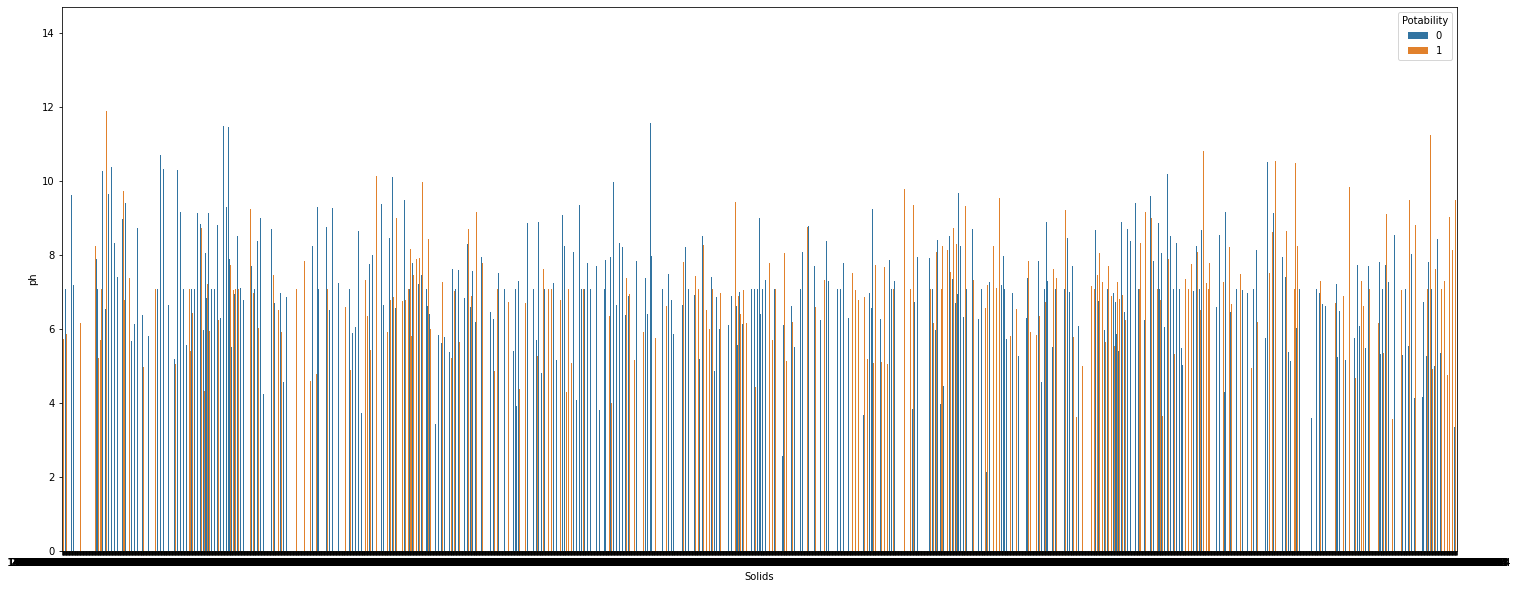

In [19]:
sns.barplot(x=data['Solids'],y=data['ph'],hue=data['Potability'])
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

### ph and its Density

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


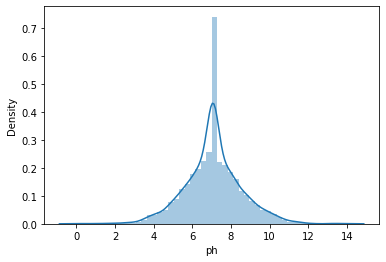

In [20]:
sns.distplot(data['ph'])
plt.show()

### Using pairplot to see distribution of single variable and relationship between two variable

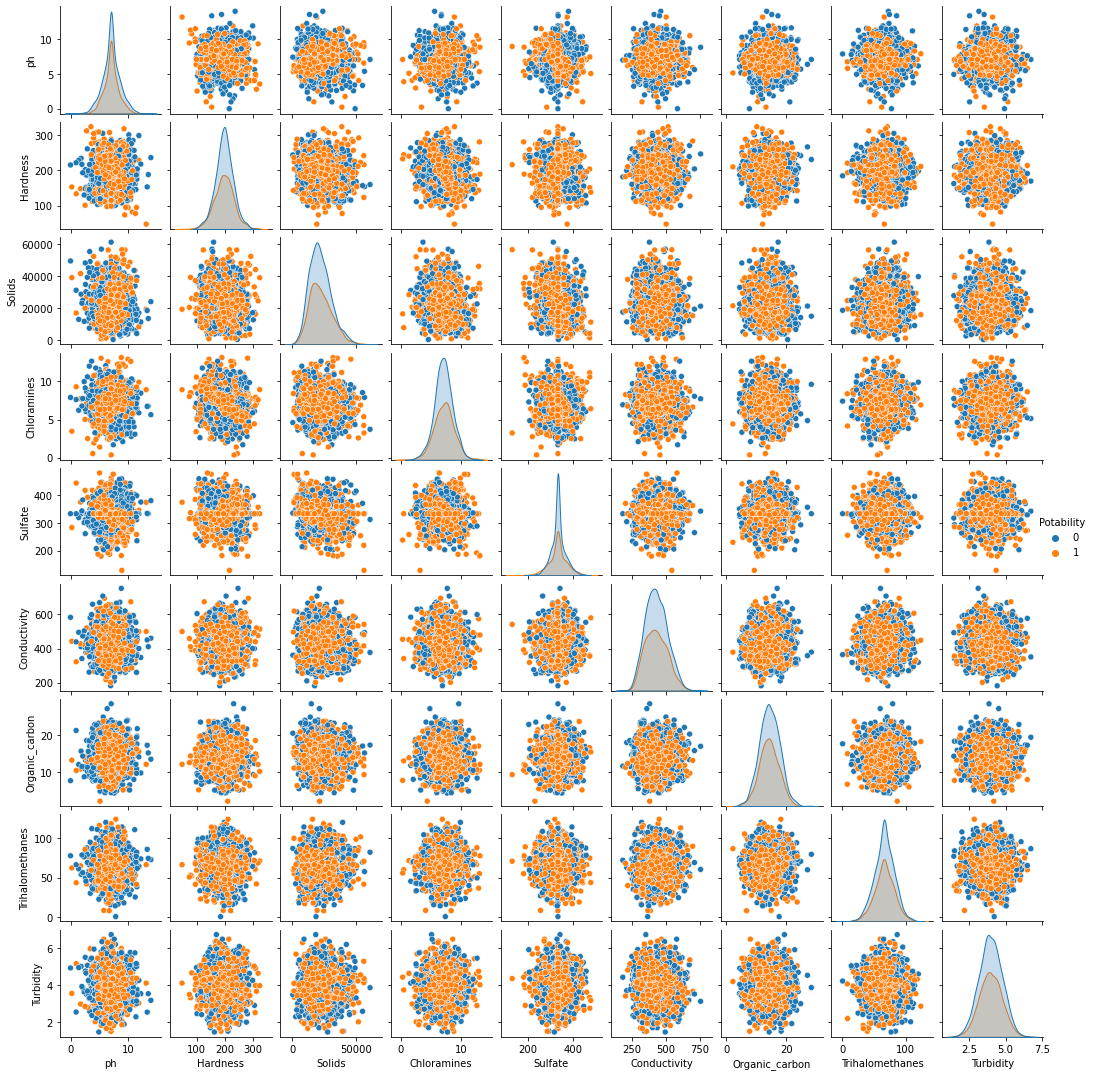

In [21]:
sns.pairplot(data,hue='Potability')
fig = plt.gcf()
fig.set_size_inches(15,15
                   )
plt.show()

### Hardness vs Solids

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


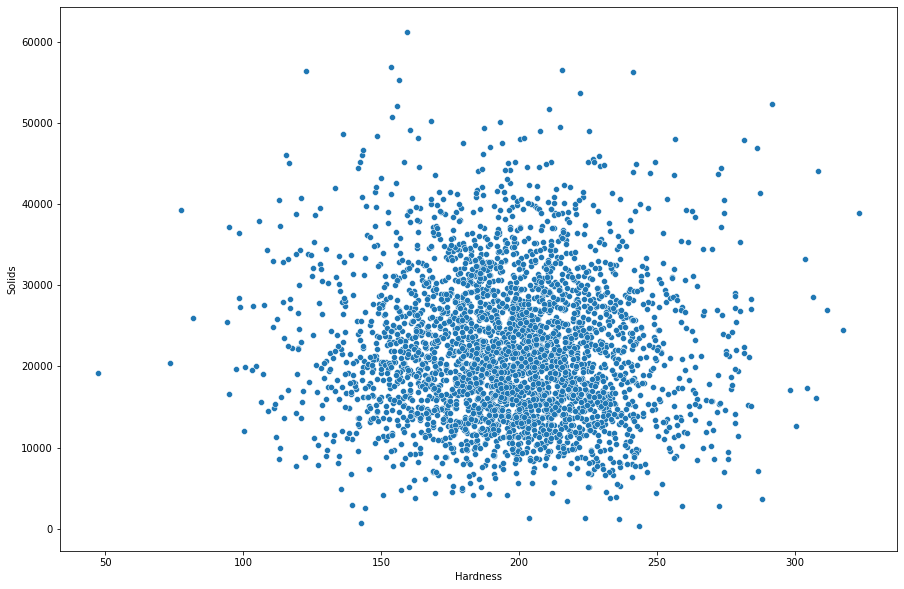

In [22]:
sns.scatterplot(data['Hardness'],data['Solids'])
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

### ph vs Potability

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


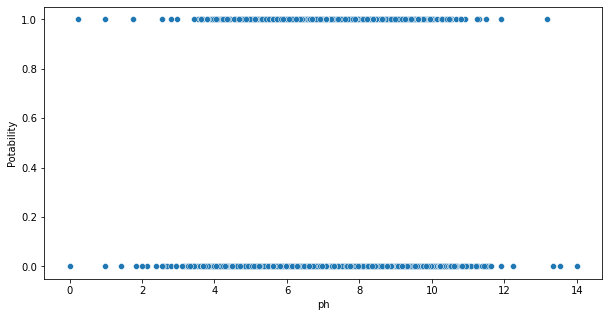

In [23]:
sns.scatterplot(data['ph'],data['Potability'])
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

# Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

# Partitioning

In [25]:
X = data.drop('Potability',axis=1) #input data

In [26]:
Y = data['Potability'] #target Variable

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=None)

As our graphs(Pair Plot) look normally distributed all along, we don't need to Nomalization on our dataset,Our Data is not skewed either. Labelencoding is not required either as we have no string values in our data.

# Model Training

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
Y_test

2233    0
266     1
3114    0
19      0
70      0
       ..
1542    1
2222    0
795     1
1161    1
677     1
Name: Potability, Length: 656, dtype: int64

In [34]:
Y_prediction = dt.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(Y_prediction,Y_test) * 100

58.6890243902439

In [39]:
confusion_matrix(Y_prediction,Y_test)

array([[257, 117],
       [154, 128]], dtype=int64)

### KNN Algorithm

# Model Optimization or Hyper Parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = range(1,10)
min_samples_leaf = range(1,10)


parameters = dict(criterion=criterion,splitter=splitter,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=5, random_state=None)

grid_search_cv_dt = GridSearchCV(estimator=dt,param_grid=parameters,scoring='accuracy',cv=cv)



In [46]:
grid_search_cv_dt.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.58412214 0.57438931 0.58694656 0.5819084
 0.58557252 0.57435115 0.58293893 0.58507634 0.58339695 0.58763359
 0.58416031 0.58145038 0.58534351 0.58648855 0.58568702 0.58446565
        nan        nan 0.59064885 0.58767176 0.58721374 0.58732824
 0.59022901 0.59015267 0.58843511 0.59125954 0.58759542 0.58370229
 0.58877863 0.59076336 0.58977099 0.58503817 0.59461832 0.59236641
        nan        nan 0.58641221 0.57992366 0.58538168 0.58843511
 0.58564885 0.58374046 0.58603053 0.58625954 0.58736641 0.58572519
 0.58549618 0.58938931 0.58912214 0.59103053 0.58919847 0.5971374
        nan        nan 0.59248092 0.59633588 0.59206107 0.58946565
 0.59091603 0.59301527 0.59110687 0.59187023 0.59225191 0.59049618
 0.59083969 0.59324427 0.59209924 0.59076336 0.5929771  0.59770992
        nan        nan 0.59412214 0.59179389 0.59343511 0.59034351
 

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'random'}


In [48]:
grid_search_cv_dt.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [50]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [52]:
accuracy_score(Y_test,prediction_grid) * 100

59.45121951219512

### Reapplying Best founded Parameters on the previous train and test data

In [53]:
dt = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf = 8, min_samples_split = 2, splitter= 'random')

In [54]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=8, splitter='random')

In [55]:
Y_prediction = dt.predict(X_test)

In [56]:
accuracy_score(Y_prediction,Y_test) * 100

60.97560975609756

In [57]:
confusion_matrix(Y_prediction,Y_test)

array([[318, 163],
       [ 93,  82]], dtype=int64)

In [59]:
confusion_matrix(Y_test,prediction_grid)

array([[303, 108],
       [158,  87]], dtype=int64)